# Around Simpson's Paradox

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import isoweek
import os
import requests

In 1972-1974, in Whickham, a town in the north-east of England, located approximately 6.5 kilometres south-west of Newcastle upon Tyne, a survey of one-sixth of the electorate was conducted in order to inform work on thyroid and heart disease (Tunbridge and al. 1977). A continuation of this study was carried out twenty years later. (Vanderpump et al. 1995). Some of the results were related to smoking and whether individuals were still alive at the time of the second study. For the purpose of simplicity, we will restrict the data to women and among these to the 1314 that were categorized as "smoking currently" or "never smoked". There were relatively few women in the initial survey who smoked but have since quit (162) and very few for which information was not available (18). Survival at 20 years was determined for all women of the first survey.

All these data are available in this [file CSV](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv). You will find on each line if the person smokes or not, whether alive or dead at the time of the second study, and his age at the time of the first survey.

__The mission is to:__

1. Tabulate the total number of women alive and dead over the period according to their smoking habits. Calculate in each group (smoking/non-smoking) the mortality rate (the ratio of the number of women who died in a group to the total number of women in that group).
2. Go back to question 1 (numbers and mortality rates) and add a new category related to the age group.
3. In order to avoid a bias induced by arbitrary and non-regular age groupings, it is possible to try to perform a logistic regression.

## 1. Smoking influence

We should check whether we have the local csv file with the data and to download it if not.

In [2]:
data_file = "smoking.csv"
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false"
if not(os.path.exists(data_file)) :
    with open(data_file, "wb") as file:
        file.write(requests.get(data_url).content)

The dataset contains the information about smoking habits, age and survivability. The first column contains index. Here is a description of the rest of the columns:

`Smoker` contains *Yes* or *No* value and shows whether a person smoked or not.

`Status` contains *Alive* or *Dead* value and shows whether a person were alive or dead.

`Age` contains a float value and indicates the age of a person.

In [6]:
data = pd.read_csv(data_file)
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

We divide the dataset into two groups depending on the `Status` value.

In [83]:
alive, dead = data[data["Status"] == "Alive"], data[data["Status"] == "Dead"]
print("Our dataset contains", alive.shape[0], "alive and", dead.shape[0], "dead persons.")

Our dataset contains 945 alive and 369 dead persons.


We calculate the mortality rate in both smoking and non-smoking groups.

In [84]:
smokers, non_smokers = data[data["Smoker"] == "Yes"], data[data["Smoker"] == "No"]
print("The mortality rate is", smokers[smokers["Status"] == "Dead"].shape[0] / smokers.shape[0] , "in smoking group and", non_smokers[non_smokers["Status"] == "Dead"].shape[0] / non_smokers.shape[0] , "in non-smoking group.")


The mortality rate is 0.23883161512027493 in smoking group and 0.31420765027322406 in non-smoking group.


We will graph these data.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


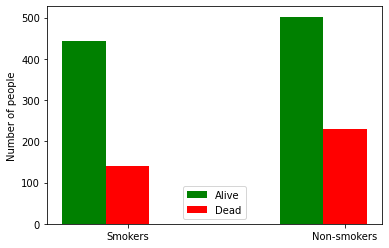

In [80]:
smokers_alive = data[data["Smoker"] == "Yes"][data["Status"] == "Alive"].shape[0]
non_smokers_alive = data[data["Smoker"] == "No"][data["Status"] == "Alive"].shape[0]
smokers_dead = data[data["Smoker"] == "Yes"].shape[0] - smokers_alive
non_smokers_dead = data[data["Smoker"] == "No"].shape[0] - non_smokers_alive

x = np.arange(2)
width = 0.2
plt.bar(x-width, height=[smokers_alive, non_smokers_alive],width=width,color='green')
plt.bar(x, [smokers_dead, non_smokers_dead], width, color='red')
plt.xticks(x, ['Smokers', 'Non-smokers'])
plt.ylabel("Number of people")
plt.legend(["Alive", "Dead"])
plt.show()

According to our data, there is almost no corelation between smoking and the death rate. Moreover, the mortality rate is a little higher in a non-smoking group. Perharps, we did not consider all the necessary factors. Therefore, we will observe the influence of the age. We distinguish four age groups :
- __young :__ under 34 years old,
- __middle-aged :__ between 34 and 55 years old,
- __elder adults :__ betwen 55 and 65 years old,
- __seniors :__ above 65 years old.

## 2. Age influence

In [105]:
young, middle_aged, elder_adults, seniors = data[data.Age < 34], data[(34 <= data.Age) & (data.Age < 55)], data[(55 <= data.Age) & (data.Age <= 65)], data[data.Age > 65]

smokers_alive = data[data["Smoker"] == "Yes"][data["Status"] == "Alive"].shape[0]


young_smokers = young[data["Smoker"] == "Yes"]
young_non_smokers = young[data["Smoker"] == "No"]
middle_aged_smokers = middle_aged[data["Smoker"] == "Yes"]
middle_aged_non_smokers = middle_aged[data["Smoker"] == "No"]
elder_adults_smokers = elder_adults[data["Smoker"] == "Yes"]
elder_adults_non_smokers = elder_adults[data["Smoker"] == "No"]
seniors_smokers = seniors[data["Smoker"] == "Yes"]
seniors_non_smokers = seniors[data["Smoker"] == "No"]

young_smokers_alive = young_smokers[data["Status"] == "Alive"]
young_non_smokers_alive = young_non_smokers[data["Status"] == "Dead"]
middle_aged_smokers_alive = middle_aged_smokers[data["Status"] == "Alive"]
middle_aged_non_smokers_alive = middle_aged_non_smokers[data["Status"] == "Dead"]
elder_adults_smokers_alive = elder_adults_smokers[data["Status"] == "Alive"]
elder_adults_non_smokers_alive = elder_adults_non_smokers[data["Status"] == "Dead"]
seniors_smokers_alive = seniors_smokers[data["Status"] == "Alive"]
seniors_non_smokers_alive = seniors_non_smokers[data["Status"] == "Dead"]

print("The mortality rate is\n",
      (young_smokers.shape[0]- young_smokers_alive.shape[0])/ young_smokers.shape[0],
      "in young smoking group,\n",
      (young_non_smokers.shape[0]- young_non_smokers_alive.shape[0]) / young_non_smokers.shape[0],
      "in young non-smoking group,\n",
      (middle_aged_smokers.shape[0]- middle_aged_smokers_alive.shape[0]) / middle_aged_smokers.shape[0],
      "in middle-aged smoking group,\n",
      (middle_aged_non_smokers.shape[0]- middle_aged_non_smokers_alive.shape[0]) / middle_aged_non_smokers.shape[0],
      "in middle-aged non-smoking group,\n",
      (elder_adults_smokers.shape[0]- elder_adults_smokers_alive.shape[0]) / elder_adults_smokers.shape[0],
      "in elder adults smoking group,\n",
      (elder_adults_non_smokers.shape[0]- elder_adults_non_smokers_alive.shape[0]) / elder_adults_non_smokers.shape[0],
      "in elder adults non-smoking group,\n",
      (seniors_smokers.shape[0]- seniors_smokers_alive.shape[0]) / seniors_smokers.shape[0],
      "in senior smoking group and\n",
      (seniors_non_smokers.shape[0]- seniors_non_smokers_alive.shape[0]) / seniors_non_smokers.shape[0],
      "in senior non-smoking group,",)


The mortality rate is
 0.027932960893854747 in young smoking group,
 0.9726027397260274 in young non-smoking group,
 0.17154811715481172 in middle-aged smoking group,
 0.9045226130653267 in middle-aged non-smoking group,
 0.4434782608695652 in elder adults smoking group,
 0.6721311475409836 in elder adults non-smoking group,
 0.8571428571428571 in senior smoking group and
 0.140625 in senior non-smoking group,


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.p

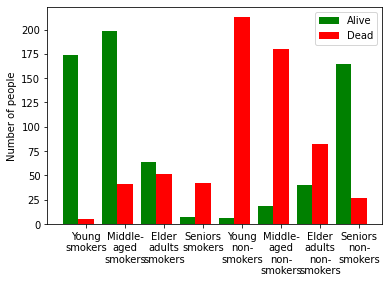

In [124]:
x = np.arange(8)
width = 0.4
plt.bar(x-width, height=[young_smokers_alive.shape[0], middle_aged_smokers_alive.shape[0], elder_adults_smokers_alive.shape[0], seniors_smokers_alive.shape[0], young_non_smokers_alive.shape[0], middle_aged_non_smokers_alive.shape[0], elder_adults_non_smokers_alive.shape[0], seniors_non_smokers_alive.shape[0]],width=width,color='green')
plt.bar(x, [young_smokers.shape[0]-young_smokers_alive.shape[0], middle_aged_smokers.shape[0]-middle_aged_smokers_alive.shape[0], elder_adults_smokers.shape[0]-elder_adults_smokers_alive.shape[0], seniors_smokers.shape[0]-seniors_smokers_alive.shape[0], young_non_smokers.shape[0]-young_non_smokers_alive.shape[0], middle_aged_non_smokers.shape[0]-middle_aged_non_smokers_alive.shape[0], elder_adults_non_smokers.shape[0]-elder_adults_non_smokers_alive.shape[0], seniors_non_smokers.shape[0]-seniors_non_smokers_alive.shape[0]], width, color='red')
plt.xticks(x, ['Young\nsmokers', 'Middle-\naged\nsmokers', 'Elder\nadults\nsmokers', 'Seniors\nsmokers', 'Young\nnon-\nsmokers', 'Middle-\naged\nnon-\nsmokers', 'Elder\nadults\nnon-\nsmokers', 'Seniors\nnon-\nsmokers'])
plt.ylabel("Number of people")
plt.legend(["Alive", "Dead"])
plt.show()

According to our data, the mortality rate is high in all the non-smoking groups except seniors as well as in the senior smoking group. Smoking affects seniors health condition because they are more vulnerable to all deseases types than others. However, in other groups we could see the opposite effect. Of course, smoking does not improve state of health, but there are other reasons which lead to death and are more dangerous than smoking such as cardiac deseases, accidents, etc.


## 3. Logistic regression analysis

As it was proposed, we will check our hypothesis with the logistic regression.

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

We need to transform our data to numerical values first.

In [126]:
numeric_data = data.copy()
numeric_data.loc[numeric_data["Smoker"] == "Yes", "Smoker"] = 1
numeric_data.loc[numeric_data["Smoker"] == "No", "Smoker"] = 0
numeric_data.loc[numeric_data["Status"] == "Alive", "Status"] = 1
numeric_data.loc[numeric_data["Status"] == "Dead", "Status"] = 0
numeric_data.dtypes

Smoker      int64
Status      int64
Age       float64
dtype: object

 We take 90% of our data to train the model and 10% to test it.

In [152]:
X_train, X_test, y_train, y_test = train_test_split(numeric_data.drop('Status',axis=1), numeric_data['Status'], test_size=0.10, random_state=1)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.67      0.69        33
          1       0.89      0.91      0.90        99

avg / total       0.85      0.85      0.85       132



We obtained satisfactory results, which could approve our hypothesis. However, it is not sufficient to conclude that there is a correlation between smoking and the mortality rate. Further analysis is neeeded.